### Employee Attrition Prediction using Logistic Regression

In [1]:
#import packages

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import dataset

df=pd.read_csv(r"C:\Users\annap\Desktop\ML_Projects_Deploy\LogisticRegression\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
len(df.columns)

35

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#'DistanceFromHome', 'MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
# 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

df[['Age','DistanceFromHome', 'MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].dtypes



Age                        int64
DistanceFromHome           int64
MonthlyIncome              int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

In [10]:
# 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'

df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].dtypes

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [11]:
#find the column categories:

col_cat=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for col_cat_val in col_cat:
    print(f"Category'{col_cat_val}':")
    print(df[col_cat_val].unique())

Category'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Category'Department':
['Sales' 'Research & Development' 'Human Resources']
Category'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Category'Gender':
['Female' 'Male']
Category'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Category'MaritalStatus':
['Single' 'Married' 'Divorced']
Category'OverTime':
['Yes' 'No']


In [12]:
# to store the column categories in  dictionary for later use

col_cat_map={col_cat_val:df[col_cat_val].unique().tolist() for col_cat_val in col_cat}
col_cat_map


{'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
 'Department': ['Sales', 'Research & Development', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Other',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Human Resources'],
 'Gender': ['Female', 'Male'],
 'JobRole': ['Sales Executive',
  'Research Scientist',
  'Laboratory Technician',
  'Manufacturing Director',
  'Healthcare Representative',
  'Manager',
  'Sales Representative',
  'Research Director',
  'Human Resources'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'OverTime': ['Yes', 'No']}

In [13]:
# Encoder for the categorical columns for later use

from sklearn.preprocessing import LabelEncoder

lab_encoder={}

for col_cat_map in col_cat:
    le=LabelEncoder()
    df[col_cat_map]=le.fit_transform(df[col_cat_map])
    lab_encoder[col_cat_map]=le

In [14]:
# encode the categorical columns

#from sklearn.preprocessing import LabelEncoder

#le=LabelEncoder()
#df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
#df['Department']=le.fit_transform(df['Department'])
#df['EducationField']=le.fit_transform(df['EducationField'])
#df['Gender']=le.fit_transform(df['Gender'])
#df['JobRole']=le.fit_transform(df['JobRole'])
#df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
#df['OverTime']=le.fit_transform(df['OverTime'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# transform the datas into independent data and dependent data

x=df[['Age','DistanceFromHome', 'MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]
y=df[ 'Attrition']
x.shape,y.shape

((1470, 16), (1470,))

In [17]:
# split  for train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1176, 16)

(1176,)

(294, 16)

(294,)

In [18]:
# algorithm and fit the model , and using solver='lbfgs' for high accuracy score

model=LogisticRegression(solver='saga',class_weight='balanced',max_iter=1000)
model.fit(x_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [19]:
# test the model

y_predict=model.predict(x_test)
print(y_predict)

['No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No

In [20]:
#Evaluation

con_mat=metrics.confusion_matrix(y_test,y_predict)
print("Confusion Matrix:\n",con_mat)

Confusion Matrix:
 [[192  63]
 [ 27  12]]


In [21]:
# Find Accuracy score

accu_score=metrics.accuracy_score(y_test,y_predict)
print("Accuracy Score:",accu_score)

print("Accuracy score in percentage:",(accu_score*100),"%",)

Accuracy Score: 0.6938775510204082
Accuracy score in percentage: 69.38775510204081 %


In [22]:
# Print Classification score

report=classification_report(y_test,y_predict)

print("classification_report:")
print(report)


classification_report:
              precision    recall  f1-score   support

          No       0.88      0.75      0.81       255
         Yes       0.16      0.31      0.21        39

    accuracy                           0.69       294
   macro avg       0.52      0.53      0.51       294
weighted avg       0.78      0.69      0.73       294



<Axes: xlabel='Predict', ylabel='Actual'>

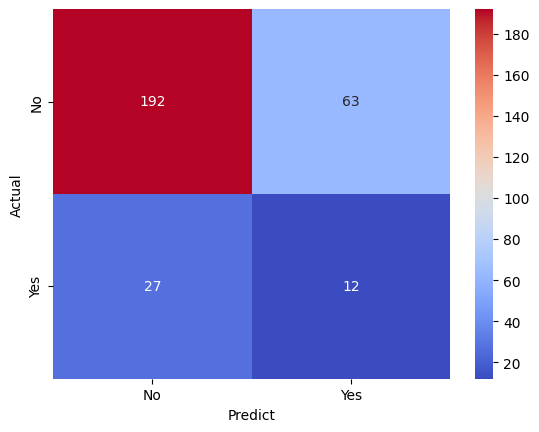

In [23]:
# plotting using heat map

import matplotlib.pyplot as plt
import seaborn as sn

con_mat=pd.crosstab(y_test,y_predict,rownames=['Actual'],colnames=['Predict'])
sn.heatmap(con_mat,annot=True,fmt='g',cmap='coolwarm')



In [24]:
#convert it to pickle

import pickle

pickle.dump(model,open('Employee_Attrition.pkl','wb'))



In [25]:
# Get user input to check
Age=int(input("Enter your age:"))
DistanceFromHome=int(input("Enter the Distance From Home"))
MonthlyIncome=int(input("Enter the Monthly Income "))
PercentSalaryHike=int(input("Enter the Percent Salary Hike "))
TotalWorkingYears=int(input("Enter your Total Working Years"))
YearsAtCompany=int(input("Enter your Years At Company "))
YearsInCurrentRole=int(input("Enter Years In Current Role "))
YearsSinceLastPromotion=int(input("Enter  Years Since Last Promotion "))
YearsWithCurrManager=int(input("Enter Years With Current Manager"))
BusinessTravel=input("Enter BusinessTravel :'Travel_Rarely', 'Travel_Frequently', 'Non-Travel' ")
Department=input("Enter your Department: 'Sales', 'Research & Development', 'Human Resources' ")
EducationField=input("Enter your Education Field: 'Life Sciences','Other','Medical','Marketing','Technical Degree','Human Resources'")
Gender=input("Enter your Gender:'Female', 'Male'")
JobRole=input("Enter your job role:'Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'")
MaritalStatus=input("Enter Marital Status: 'Single', 'Married', 'Divorced'")
OverTime=input("Enter Over time Yes/No")


# Convert string inputs to numeric using saved encoders
BusinessTravel = lab_encoder['BusinessTravel'].transform([BusinessTravel])[0]
Department = lab_encoder['Department'].transform([Department])[0]
EducationField = lab_encoder['EducationField'].transform([EducationField])[0]
Gender = lab_encoder['Gender'].transform([Gender])[0]
JobRole = lab_encoder['JobRole'].transform([JobRole])[0]
MaritalStatus = lab_encoder['MaritalStatus'].transform([MaritalStatus])[0]
OverTime = lab_encoder['OverTime'].transform([OverTime])[0]


p=pickle.load(open('Employee_Attrition.pkl','rb'))
p.predict([[Age,DistanceFromHome, MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime]])





ValueError: y contains previously unseen labels: 'Life Science'